# OBJECTIVE:

Provided is a dataset of survivors from a shipwreck.Inferences to be drawn from the parameters given by exploratory data analysis

In [ ]:
#importing the necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#importing the csv file
df=pd.read_csv('Survivors.csv')
df.head()

,Rowno,PassengerClass,Name,Sex,Age,NoOfSiblings,Noofparents or ChildernOnboard,TicketNo,PassengerFare,Cabin,CabinDeck,PortOfEmbarkation,Lifeboat,Survived
0,1,First,"Allen, Miss. Elisabeth Walton",Female,29,0,0,24160,211.34,B5,B,Southampton,2,No
1,2,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.55,C22 C26,C,Southampton,11,No
2,3,First,"Allison, Miss. Helen Loraine",Female,2,1,2,113781,151.55,C22 C26,C,Southampton,?,Yes
3,4,First,"Allison, Mr. Hudson Joshua Creighton",Male,30,1,2,113781,151.55,C22 C26,C,Southampton,?,Yes
4,5,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25,1,2,113781,151.55,C22 C26,C,Southampton,?,Yes


In [ ]:
#dropping unnecessary columns
df2=df.drop(['Lifeboat','Noofparents or ChildernOnboard','NoOfSiblings'],axis=1)
df2.head()

,Rowno,PassengerClass,Name,Sex,Age,TicketNo,PassengerFare,Cabin,CabinDeck,PortOfEmbarkation,Survived
0,1,First,"Allen, Miss. Elisabeth Walton",Female,29,24160,211.34,B5,B,Southampton,No
1,2,First,"Allison, Master. Hudson Trevor",Male,0.9167,113781,151.55,C22 C26,C,Southampton,No
2,3,First,"Allison, Miss. Helen Loraine",Female,2,113781,151.55,C22 C26,C,Southampton,Yes
3,4,First,"Allison, Mr. Hudson Joshua Creighton",Male,30,113781,151.55,C22 C26,C,Southampton,Yes
4,5,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25,113781,151.55,C22 C26,C,Southampton,Yes


In [ ]:
df2['PassengerClass'].unique()

array(['First', 'Second', 'Third'], dtype=object)

# Survivor Analysis among First class, Second class and Third class passengers

---



In [ ]:

N_fc =df2.loc[df2['PassengerClass']=='First']
N_sc =df2.loc[df2['PassengerClass']=='Second']
N_tc =df2.loc[df2['PassengerClass']=='Third']

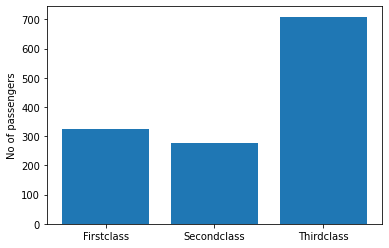

In [ ]:
Class=['Firstclass','Secondclass','Thirdclass']
N=[len(N_fc),len(N_sc),len(N_tc)]

plt.ylabel('No of passengers')
plt.bar(Class,N)
plt.show()

In [ ]:
N_fcs =df2.loc[(df2['PassengerClass']=='First') & (df2['Survived']=='Yes')]
N_scs =df2.loc[(df2['PassengerClass']=='Second') & (df2['Survived']=='Yes')]
N_tcs =df2.loc[(df2['PassengerClass']=='Third') & (df2['Survived']=='Yes')]

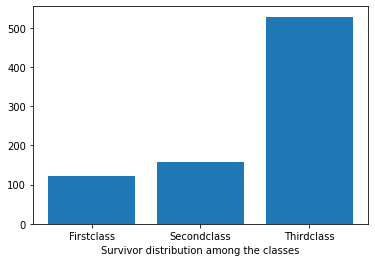

Total number of survivors= 809
Total number of deceased= 500


In [ ]:
List=[len(N_fcs),len(N_scs),len(N_tcs)]

plt.xlabel('Survivor distribution among the classes')
plt.bar(Class,List)
plt.show()

print('Total number of survivors=',len(N_fcs)+len(N_scs)+len(N_tcs))
print('Total number of deceased=',len(df2)-(len(N_fcs)+len(N_scs)+len(N_tcs)))

To get a clearer picture of the survival rate among classes ,we have to use stacked bar plots

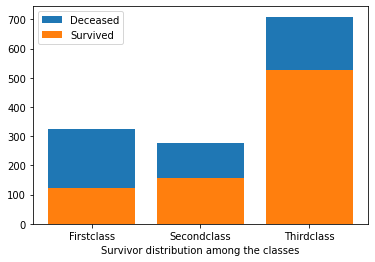

In [ ]:
plt.xlabel('Survivor distribution among the classes')
plt.bar(Class,N,label='Deceased')
plt.bar(Class,List,label='Survived')
plt.legend()
plt.show()

Distribution of gender among the passengers and analyzing the relation between gender and survival


---



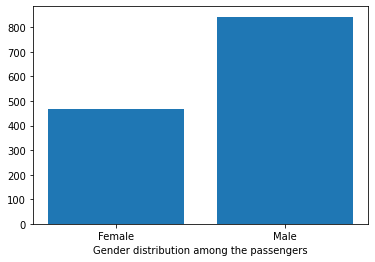

In [ ]:
N_female=df2.loc[df2['Sex']=='Female']
N_male=df2.loc[df2['Sex']=='Male']

gen=[len(N_female),len(N_male)]
Sex=['Female','Male']

plt.xlabel('Gender distribution among the passengers')
plt.bar(Sex,gen)
plt.show()

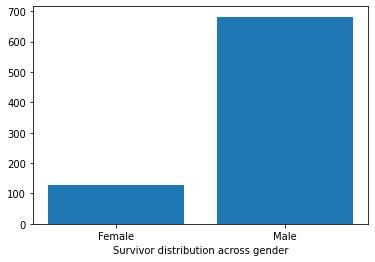

Number of Male survivors= 682
Number of Female survivors= 127


In [ ]:
N_fems =df2.loc[(df2['Sex']=='Female') & (df2['Survived']=='Yes')] #List of female passengers who survived
N_mals =df2.loc[(df2['Sex']=='Male') & (df2['Survived']=='Yes')]   #List of Male passengers who survived

gens=[len(N_fems),len(N_mals)]

plt.xlabel('Survivor distribution across gender')
plt.bar(Sex,gens)
plt.show()

print('Number of Male survivors=',len(N_mals))
print('Number of Female survivors=',len(N_fems))


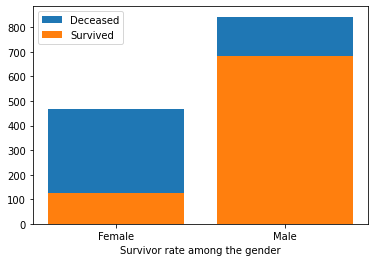

In [ ]:
plt.xlabel('Survivor rate among the gender')
plt.bar(Sex,gen,label='Deceased')
plt.bar(Sex,gens,label='Survived')
plt.legend()
plt.show()

In [ ]:
len(df['PassengerClass'].unique())

3

In [ ]:
x = np.arange(len(df['PassengerClass'],unique()))
width = 0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

Survivor analysis based on passenger embarked geographic location

---


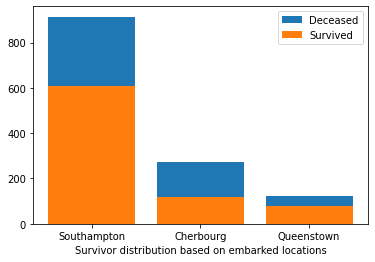

In [ ]:
places=df2['PortOfEmbarkation'].unique()
#places=places.tolist

N_sou =df2.loc[df2['PortOfEmbarkation']=='Southampton']
N_cher =df2.loc[df2['PortOfEmbarkation']=='Cherbourg']
N_que =df2.loc[df2['PortOfEmbarkation']=='Queenstown']

N_sous =df2.loc[(df2['PortOfEmbarkation']=='Southampton') & (df2['Survived']=='Yes')]
N_chers =df2.loc[(df2['PortOfEmbarkation']=='Cherbourg') & (df2['Survived']=='Yes')]
N_ques =df2.loc[(df2['PortOfEmbarkation']=='Queenstown') & (df2['Survived']=='Yes')]

tot=[len(N_sou),len(N_cher),len(N_que)]
sur_geo=[len(N_sous),len(N_chers),len(N_ques)]

plt.xlabel('Survivor distribution based on embarked locations')
plt.bar(places,tot,label='Deceased')
plt.bar(places,sur_geo,label='Survived')
plt.legend()
plt.show()





Analyzing the relation between age and survival

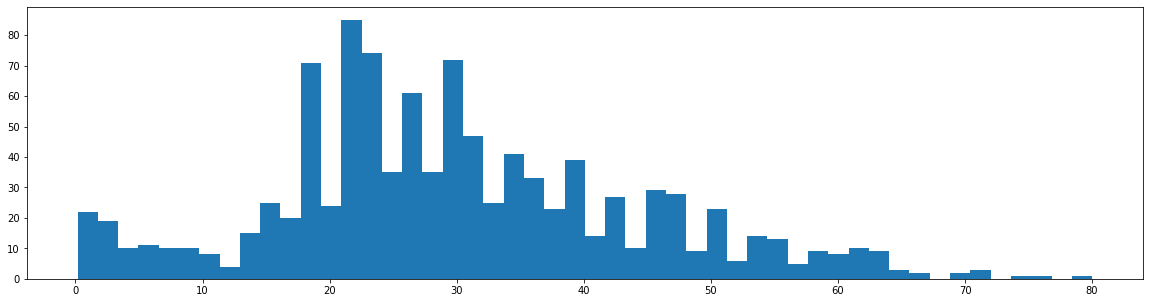

In [ ]:
dAge=df[df['Age']!= '?']   #Removing all the values where age is not specified
dAge=dAge['Age'].astype(float)
Age=dAge.sort_values()

plt.figure(figsize=(20,5))
plt.hist(Age,bins=50)
plt.show()

As we can see from the histogram that a lot of passengers are between the age of 18 and 30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


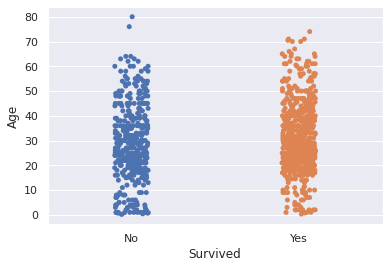

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
dff=df[df['Age']!= '?']
dff['Age']=dff['Age'].astype(float)

#dff=dff['Age'].sort_values()
#Df=pd.DataFrame()

p= sns.stripplot(data=dff, x='Survived', y='Age')

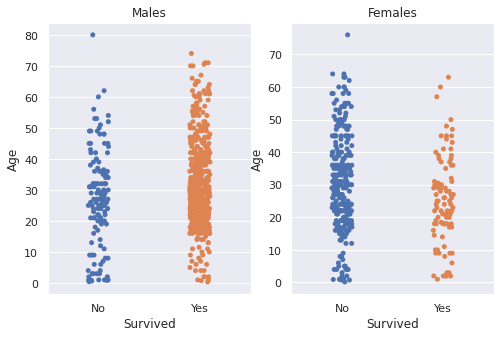

In [ ]:
df_male=dff.loc[df['Sex']=='Male']
df_female=dff.loc[df['Sex']=='Female']

sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1,2, figsize=(8, 5))
sns.stripplot(ax=axes[0],data=df_male, x='Survived', y='Age')
axes[0].set_title('Males')
sns.stripplot(ax=axes[1],data=df_female, x='Survived', y='Age')
axes[1].set_title('Females')
plt.show()

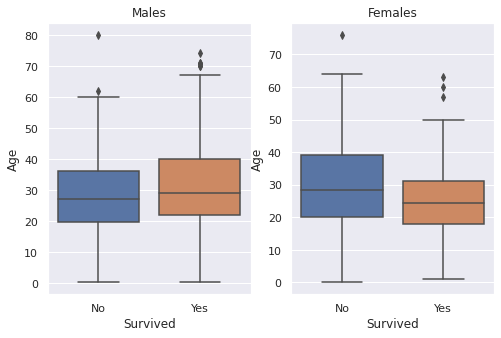

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8, 5))
sns.boxplot(ax=axes[0],x = 'Survived', y = 'Age', data = df_male)
axes[0].set_title('Males')
sns.boxplot(ax=axes[1],x = 'Survived', y = 'Age', data = df_female)
axes[1].set_title('Females')
plt.show()


When comparing male passengers, the median age of survivors is more than those who died. However, its the opposite in female passengers.

# Conclusion



*   The passengers with third class ticket are the highest
*   Majority of the passengers in the ship are male
*   Survival rate among Males is the highest 
*   Survival rate among third class is the highest
*   Majority  of passengers are from Southampton
*   Survival rate mong passengers from Southampton is the highest
*   A significant of passengers travelling are aged between 18 and 30
*   When comparing male passengers, the median age of survivors is more than those who died. However, its the opposite in female passengers.





   









